In [11]:
# initial imports
import nltk
from nltk.corpus import reuters
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

plt.style.use("seaborn-whitegrid")
mpl.rcParams["figure.figsize"] = [20.0, 10.0]


 ## Loading the Reuters Corpus

 The first step is to load the Reuters Corpus.

In [12]:
# Download/update the Reuters dataset
nltk.download("reuters")


[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\EAMA\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

In [13]:
# Getting all documents ids under the money-fx and money-supply categories
categories = ["money-fx", "money-supply"]
all_docs_id = reuters.fileids()
money_news_ids = [
    doc
    for doc in all_docs_id
    if categories[0] in reuters.categories(doc)
    or categories[1] in reuters.categories(doc)
]

print(f"Total number of news articles about money: {len(money_news_ids)}")

money_news_ids

Total number of news articles about money: 883


['test/14849',
 'test/14861',
 'test/14890',
 'test/14913',
 'test/14919',
 'test/14931',
 'test/14964',
 'test/14987',
 'test/15048',
 'test/15212',
 'test/15234',
 'test/15242',
 'test/15246',
 'test/15253',
 'test/15364',
 'test/15375',
 'test/15378',
 'test/15431',
 'test/15436',
 'test/15442',
 'test/15444',
 'test/15448',
 'test/15449',
 'test/15450',
 'test/15452',
 'test/15453',
 'test/15460',
 'test/15510',
 'test/15522',
 'test/15523',
 'test/15527',
 'test/15539',
 'test/15552',
 'test/15615',
 'test/15621',
 'test/15625',
 'test/15636',
 'test/15656',
 'test/15677',
 'test/15689',
 'test/15694',
 'test/15950',
 'test/15951',
 'test/15976',
 'test/15977',
 'test/15978',
 'test/15987',
 'test/15989',
 'test/15996',
 'test/16004',
 'test/16006',
 'test/16009',
 'test/16053',
 'test/16063',
 'test/16066',
 'test/16067',
 'test/16068',
 'test/16069',
 'test/16072',
 'test/16083',
 'test/16106',
 'test/16111',
 'test/16133',
 'test/16143',
 'test/16161',
 'test/16177',
 'test/161

In [ ]:
[['test/14849',
  'test/14861',
  'test/14890',
  'test/14913',
  'test/14919',
  'test/14931',
  'test/14964',
  'test/14987',
  'test/15048',
  'test/15212',
  'test/15234',
  'test/15253',
  'test/15364',
  'test/15375',
  'test/15378',
  'test/15431',
  'test/15436',
  'test/15442',
  'test/15444',
  'test/15448',
  'test/15449',
  'test/15450',
  'test/15452',
  'test/15453',
  'test/15460',
  'test/15510',
  'test/15522',
  'test/15523',
  'test/15527',
  'test/15539',
  'test/15615',
  'test/15621',
  'test/15625',
  'test/15636',
  'test/15656',
  'test/15677',
  'test/15689',
  'test/15694',
  'test/16004',
  'test/16006',
  'test/16009',
  'test/16053',
  'test/16066',
  'test/16067',
  'test/16068',
  'test/16069',
  'test/16072',
  'test/16106',
  'test/16111',
  'test/16133',
  'test/16143',
  'test/16161',
  'test/16177',
  'test/16180',
  'test/16188',
  'test/16189',
  'test/16190',
  'test/16213',
  'test/16251',
  'test/16285',
  'test/16331',
  'test/16383',
  'test/16565',
  'test/16743',
  'test/16744',
  'test/16754',
  'test/16770',
  'test/16903',
  'test/17041',
  'test/17044',
  'test/17047',
  'test/17523',
  'test/17577',
  'test/17620',
  'test/17742',
  'test/17748',
  'test/17871',
  'test/17877',
  'test/17915',
  'test/17930',
  'test/17952',
  'test/17980',
  'test/18010',
  'test/18012',
  'test/18050',
  'test/18051',
  'test/18086',
  'test/18136',
  'test/18142',
  'test/18185',
  'test/18360',
  'test/18363',
  'test/18370',
  'test/18625',
  'test/18668',
  'test/18674',
  'test/18724',
  'test/18750',
  'test/18763',
  'test/19021',
  'test/19023',
  'test/19028',
  'test/19040',
  'test/19061',
  'test/19201',
  'test/19229',
  'test/19237',
  'test/19418',
  'test/19489',
  'test/19537',
  'test/19541',
  'test/19689',
  'test/19693',
  'test/19869',
  'test/19989',
  'test/19991',
  'test/19993',
  'test/20001',
  'test/20009',
  'test/20012',
  'test/20013',
  'test/20068',
  'test/20071',
  'test/20080',
  'test/20081',
  'test/20082',
  'test/20083',
  'test/20087',
  'test/20089',
  'test/20259',
  'test/20263',
  'test/20343',
  'test/20347',
  'test/20348',
  'test/20377',
  'test/20496',
  'test/20500',
  'test/20631',
  'test/20678',
  'test/20764',
  'test/20795',
  'test/20858',
  'test/20862',
  'test/20868',
  'test/20893',
  'test/20907',
  'test/20922',
  'test/20925',
  'test/20941',
  'test/20948',
  'test/20958',
  'test/21023',
  'test/21122',
  'test/21128',
  'test/21138',
  'test/21151',
  'test/21157',
  'test/21163',
  'test/21172',
  'test/21202',
  'test/21277',
  'test/21303',
  'test/21323',
  'test/21339',
  'test/21343',
  'test/21468',
  'test/21477',
  'test/21496',
  'test/21508',
  'test/21510',
  'test/21511',
  'test/21512',
  'test/21521',
  'test/21535',
  'test/21539',
  'test/21542',
  'test/21556',
  'test/21561',
  'test/21573',
  'training/10048',
  'training/10075',
  'training/1008',
  'training/10081',
  'training/10091',
  'training/10136',
  'training/10191',
  'training/10263',
  'training/10308',
  'training/10321',
  'training/10323',
  'training/10337',
  'training/10340',
  'training/10344',
  'training/10354',
  'training/10356',
  'training/10357',
  'training/10358',
  'training/10359',
  'training/10364',
  'training/10368',
  'training/10370',
  'training/10382',
  'training/10416',
  'training/10418',
  'training/10475',
  'training/10503',
  'training/10546',
  'training/10606',
  'training/10617',
  'training/10618',
  'training/10622',
  'training/10633',
  'training/10636',
  'training/10638',
  'training/10650',
  'training/10651',
  'training/10652',
  'training/10653',
  'training/10654',
  'training/10657',
  'training/10658',
  'training/10659',
  'training/10660',
  'training/10661',
  'training/10679',
  'training/10681',
  'training/10684',
  'training/10689',
  'training/10696',
  'training/10704',
  'training/10710',
  'training/10718',
  'training/10731',
  'training/10734',
  'training/10736',
  'training/10749',
  'training/10751',
  'training/10755',
  'training/10756',
  'training/10762',
  'training/10766',
  'training/10769',
  'training/10770',
  'training/10771',
  'training/10773',
  'training/10774',
  'training/10780',
  'training/10782',
  'training/10796',
  'training/10804',
  'training/10807',
  'training/10808',
  'training/10809',
  'training/10859',
  'training/10864',
  'training/1088',
  'training/10913',
  'training/11000',
  'training/11059',
  'training/11103',
  'training/1112',
  'training/11120',
  'training/11135',
  'training/11193',
  'training/11200',
  'training/11203',
  'training/11209',
  'training/11212',
  'training/11228',
  'training/11234',
  'training/11238',
  'training/11244',
  'training/11256',
  'training/11263',
  'training/11281',
  'training/11284',
  'training/11297',
  'training/11322',
  'training/11365',
  'training/11417',
  'training/11430',
  'training/11447',
  'training/11450',
  'training/1154',
  'training/11551',
  'training/11734',
  'training/11753',
  'training/11764',
  'training/11772',
  'training/11774',
  'training/11776',
  'training/11783',
  'training/11794',
  'training/11798',
  'training/11820',
  'training/11832',
  'training/11844',
  'training/11864',
  'training/11938',
  'training/11944',
  'training/11946',
  'training/11972',
  'training/12121',
  'training/12136',
  'training/12145',
  'training/12177',
  'training/12183',
  'training/12396',
  'training/12406',
  'training/12410',
  'training/12413',
  'training/12416',
  'training/12418',
  'training/12422',
  'training/12437',
  'training/12447',
  'training/12453',
  'training/12456',
  'training/12470',
  'training/12471',
  'training/12494',
  'training/12501',
  'training/12522',
  'training/12523',
  'training/12554',
  'training/12588',
  'training/12593',
  'training/12741',
  'training/12745',
  'training/12780',
  'training/12785',
  'training/12789',
  'training/12791',
  'training/12795',
  'training/12801',
  'training/12806',
  'training/12812',
  'training/12815',
  'training/12819',
  'training/12840',
  'training/12842',
  'training/12877',
  'training/12923',
  'training/13053',
  'training/13243',
  'training/13244',
  'training/13245',
  'training/13261',
  'training/13270',
  'training/13315',
  'training/13398',
  'training/13404',
  'training/13512',
  'training/13524',
  'training/13530',
  'training/13531',
  'training/13544',
  'training/13552',
  'training/13660',
  'training/13739',
  'training/13831',
  'training/13869',
  'training/13903',
  'training/13919',
  'training/13949',
  'training/13950',
  'training/13958',
  'training/13988',
  'training/13994',
  'training/14034',
  'training/14055',
  'training/14150',
  'training/14178',
  'training/14207',
  'training/1421',
  'training/1457',
  'training/14655',
  'training/14686',
  'training/14757',
  'training/14767',
  'training/14770',
  'training/14777',
  'training/14779',
  'training/14785',
  'training/1503',
  'training/1514',
  'training/1533',
  'training/1553',
  'training/1560',
  'training/1724',
  'training/1811',
  'training/1926',
  'training/1931',
  'training/1943',
  'training/1949',
  'training/1967',
  'training/1976',
  'training/1982',
  'training/1983',
  'training/2022',
  'training/2025',
  'training/2178',
  'training/2181',
  'training/2190',
  'training/221',
  'training/2286',
  'training/2327',
  'training/2352',
  'training/2354',
  'training/2406',
  'training/2452',
  'training/247',
  'training/256',
  'training/2565',
  'training/2576',
  'training/2601',
  'training/2623',
  'training/2626',
  'training/2633',
  'training/2678',
  'training/2683',
  'training/2697',
  'training/2765',
  'training/296',
  'training/2966',
  'training/2993',
  'training/2996',
  'training/3001',
  'training/3002',
  'training/3020',
  'training/3031',
  'training/3044',
  'training/3060',
  'training/3065',
  'training/3067',
  'training/3068',
  'training/307',
  'training/3076',
  'training/3121',
  'training/3137',
  'training/3159',
  'training/3164',
  'training/3222',
  'training/3267',
  'training/3292',
  'training/3338',
  'training/336',
  'training/341',
  'training/3411',
  'training/3419',
  'training/3421',
  'training/3433',
  'training/3435',
  'training/3442',
  'training/3461',
  'training/3482',
  'training/3483',
  'training/3493',
  'training/3514',
  'training/3526',
  'training/3532',
  'training/3533',
  'training/3535',
  'training/3554',
  'training/3584',
  'training/3593',
  'training/3612',
  'training/3666',
  'training/3694',
  'training/3729',
  'training/3735',
  'training/4038',
  'training/4088',
  'training/4090',
  'training/4093',
  'training/411',
  'training/4131',
  'training/4139',
  'training/4170',
  'training/4188',
  'training/4275',
  'training/4293',
  'training/4298',
  'training/4616',
  'training/4633',
  'training/4666',
  'training/4675',
  'training/4680',
  'training/4682',
  'training/4703',
  'training/4709',
  'training/4712',
  'training/4720',
  'training/475',
  'training/4768',
  'training/4783',
  'training/4809',
  'training/4822',
  'training/4829',
  'training/4882',
  'training/5070',
  'training/5176',
  'training/5181',
  'training/5183',
  'training/519',
  'training/5190',
  'training/5193',
  'training/5201',
  'training/5204',
  'training/5206',
  'training/522',
  'training/5223',
  'training/5232',
  'training/5241',
  'training/5269',
  'training/5271',
  'training/5277',
  'training/5279',
  'training/5280',
  'training/5290',
  'training/5336',
  'training/5338',
  'training/5344',
  'training/5360',
  'training/5394',
  'training/5404',
  'training/5412',
  'training/5434',
  'training/5439',
  'training/5778',
  'training/5779',
  'training/5811',
  'training/5814',
  'training/5819',
  'training/5841',
  'training/5858',
  'training/5861',
  'training/5905',
  'training/5909',
  'training/5945',
  'training/5998',
  'training/6044',
  'training/6046',
  'training/6083',
  'training/6108',
  'training/6137',
  'training/6338',
  'training/6357',
  'training/6359',
  'training/6394',
  'training/6399',
  'training/6400',
  'training/6426',
  'training/6445',
  'training/6452',
  'training/6531',
  'training/6543',
  'training/6576',
  'training/6945',
  'training/6981',
  'training/7020',
  'training/7027',
  'training/7036',
  'training/7043',
  'training/7080',
  'training/7100',
  'training/7159',
  'training/7204',
  'training/7207',
  'training/7312',
  'training/7313',
  'training/7375',
  'training/7394',
  'training/7429',
  'training/7460',
  'training/7538',
  'training/7559',
  'training/7562',
  'training/7568',
  'training/7571',
  'training/7587',
  'training/7599',
  'training/7614',
  'training/7628',
  'training/7652',
  'training/7669',
  'training/7710',
  'training/7716',
  'training/7764',
  'training/7769',
  'training/7804',
  'training/7950',
  'training/8064',
  'training/8074',
  'training/8097',
  'training/8098',
  'training/8145',
  'training/8147',
  'training/8153',
  'training/8168',
  'training/8182',
  'training/8189',
  'training/8194',
  'training/8199',
  'training/8234',
  'training/8247',
  'training/8299',
  'training/8302',
  'training/8309',
  'training/8563',
  'training/8578',
  'training/8584',
  'training/8586',
  'training/8587',
  'training/8588',
  'training/8590',
  'training/8591',
  'training/8597',
  'training/8605',
  'training/8607',
  'training/8621',
  'training/8629',
  'training/8641',
  'training/8657',
  'training/8658',
  'training/8664',
  'training/8670',
  'training/8674',
  'training/8678',
  'training/8710',
  'training/8714',
  'training/872',
  'training/8723',
  'training/8728',
  'training/8735',
  'training/8760',
  'training/8796',
  'training/8845',
  'training/8884',
  'training/8922',
  'training/8984',
  'training/9007',
  'training/9022',
  'training/903',
  'training/9054',
  'training/9055',
  'training/9061',
  'training/9079',
  'training/9118',
  'training/9120',
  'training/9128',
  'training/9129',
  'training/913',
  'training/9131',
  'training/9132',
  'training/9134',
  'training/9138',
  'training/9149',
  'training/915',
  'training/9162',
  'training/9164',
  'training/9166',
  'training/9170',
  'training/9213',
  'training/9214',
  'training/9216',
  'training/9217',
  'training/9218',
  'training/9220',
  'training/9222',
  'training/9224',
  'training/926',
  'training/9261',
  'training/9282',
  'training/9295',
  'training/9299',
  'training/9361',
  'training/9377',
  'training/942',
  'training/943',
  'training/9498',
  'training/953',
  'training/9534',
  'training/9535',
  'training/9656',
  'training/9681',
  'training/9686',
  'training/9689',
  'training/9698',
  'training/9699',
  'training/9701',
  'training/9720',
  'training/9727',
  'training/9730',
  'training/9745',
  'training/9753',
  'training/9764',
  'training/9781',
  'training/9783',
  'training/9784',
  'training/9792',
  'training/9797',
  'training/9848',
  'training/9851',
  'training/9852',
  'training/9855',
  'training/9857',
  'training/9862',
  'training/9864',
  'training/9871',
  'training/9880',
  'training/9923',
  'training/9946',
  'training/9955',
  'training/9957',
  'training/9975',
  'training/999'],
 ['test/15242',
  'test/15246',
  'test/15552',
  'test/15950',
  'test/15951',
  'test/15976',
  'test/15977',
  'test/15978',
  'test/15987',
  'test/15989',
  'test/15996',
  'test/16063',
  'test/16083',
  'test/16250',
  'test/16268',
  'test/16282',
  'test/16650',
  'test/16755',
  'test/16779',
  'test/16908',
  'test/17036',
  'test/17042',
  'test/17051',
  'test/18487',
  'test/18537',
  'test/18946',
  'test/19028',
  'test/19284',
  'test/19294',
  'test/19416',
  'test/20016',
  'test/20025',
  'test/20062',
  'test/20063',
  'training/100',
  'training/10079',
  'training/101',
  'training/10153',
  'training/10154',
  'training/10155',
  'training/10176',
  'training/10177',
  'training/10178',
  'training/10183',
  'training/102',
  'training/10246',
  'training/103',
  'training/10592',
  'training/10594',
  'training/10708',
  'training/10737',
  'training/10746',
  'training/10754',
  'training/10757',
  'training/109',
  'training/111',
  'training/11765',
  'training/12429',
  'training/12576',
  'training/12748',
  'training/12758',
  'training/12841',
  'training/13010',
  'training/13019',
  'training/1308',
  'training/13143',
  'training/13157',
  'training/13158',
  'training/13159',
  'training/132',
  'training/133',
  'training/13468',
  'training/13471',
  'training/13949',
  'training/13994',
  'training/14573',
  'training/14770',
  'training/1898',
  'training/1912',
  'training/1933',
  'training/198',
  'training/203',
  'training/216',
  'training/220',
  'training/2403',
  'training/2441',
  'training/2442',
  'training/2465',
  'training/2466',
  'training/2468',
  'training/2554',
  'training/2686',
  'training/2743',
  'training/2744',
  'training/2858',
  'training/2870',
  'training/2872',
  'training/2994',
  'training/30',
  'training/3049',
  'training/3073',
  'training/3246',
  'training/330',
  'training/3348',
  'training/3524',
  'training/3661',
  'training/3930',
  'training/4487',
  'training/4515',
  'training/4516',
  'training/4519',
  'training/4532',
  'training/4533',
  'training/4534',
  'training/4544',
  'training/4602',
  'training/4686',
  'training/4929',
  'training/4938',
  'training/5059',
  'training/5060',
  'training/5207',
  'training/5251',
  'training/5253',
  'training/5782',
  'training/5797',
  'training/5798',
  'training/58',
  'training/5836',
  'training/6156',
  'training/6619',
  'training/6970',
  'training/7007',
  'training/7009',
  'training/7012',
  'training/7014',
  'training/7029',
  'training/7036',
  'training/7313',
  'training/7419',
  'training/7420',
  'training/7421',
  'training/7425',
  'training/7426',
  'training/7428',
  'training/7437',
  'training/7499',
  'training/7554',
  'training/7555',
  'training/7587',
  'training/76',
  'training/7674',
  'training/77',
  'training/7767',
  'training/78',
  'training/7807',
  'training/7818',
  'training/7971',
  'training/7980',
  'training/80',
  'training/81',
  'training/830',
  'training/839',
  'training/8636',
  'training/8723',
  'training/9107',
  'training/9178',
  'training/92',
  'training/94',
  'training/940',
  'training/95',
  'training/9700',
  'training/9752',
  'training/99']]

In [10]:
# Creating the working corpus containing the text from all the news articles about money
money_news = [reuters.raw(doc).lower() for doc in money_news_ids]

# Printing a sample article
money_news


["bundesbank allocates 6.1 billion marks in tender\n  the bundesbank accepted bids for 6.1\n  billion marks at today's tender for a 28-day securities\n  repurchase pact at a fixed rate of 3.80 pct, a central bank\n  spokesman said.\n      banks, which bid for a total 12.2 billion marks liquidity,\n  will be credited with the funds allocated today and must buy\n  back securities pledged on may 6.\n      some 14.9 billion marks will drain from the market today as\n  an earlier pact expires, so the bundesbank is effectively\n  withdrawing a net 8.1 billion marks from the market with\n  today's allocation.\n      a bundesbank spokesman said in answer to enquiries that the\n  withdrawal of funds did not reflect a tightening of credit\n  policy, but was to be seen in the context of plentiful\n  liquidity in the banking system.\n      banks held an average 59.3 billion marks at the bundesbank\n  over the first six days of the month, well clear of the likely\n  april minimum reserve requiremen

In [5]:
# Calculating TF-IDF for the working corpus.
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(money_news)


In [6]:
# Creating a DataFrame Representation of the TF-IDF results
money_news_df = pd.DataFrame(
    list(zip(vectorizer.get_feature_names(), np.ravel(X.sum(axis=0)))),
    columns=["Word", "Frequency"],
)

# Order the DataFrame by word frequency in descending order
money_news_df = money_news_df.sort_values(by=["Frequency"], ascending=False)

# Print the top 10 words
money_news_df.head(10)


,Word,Frequency
5876,said,54.918051
4424,mln,51.533825
1252,bank,49.568996
6397,stg,47.236863
1353,billion,43.544274
4880,pct,41.917193
2461,dollar,37.178790
2939,fed,36.860352
2452,dlrs,36.273205
4265,market,35.086673


In [7]:
# Top words will be those with a frequency between 10 ans 30 (rule of thumb)
top_words = money_news_df[
    (money_news_df["Frequency"] >= 10) & (money_news_df["Frequency"] <= 30)
]

top_words.head(10)


,Word,Frequency
7324,yen,28.343276
5913,says,26.248262
3844,japan,23.927655
2783,exchange,22.504089
2158,dealers,22.503656
5365,rate,21.277388
7203,week,20.247803
5366,rates,19.969733
1620,central,18.079040
2105,currency,17.370210


 ## Creating Word Cloud


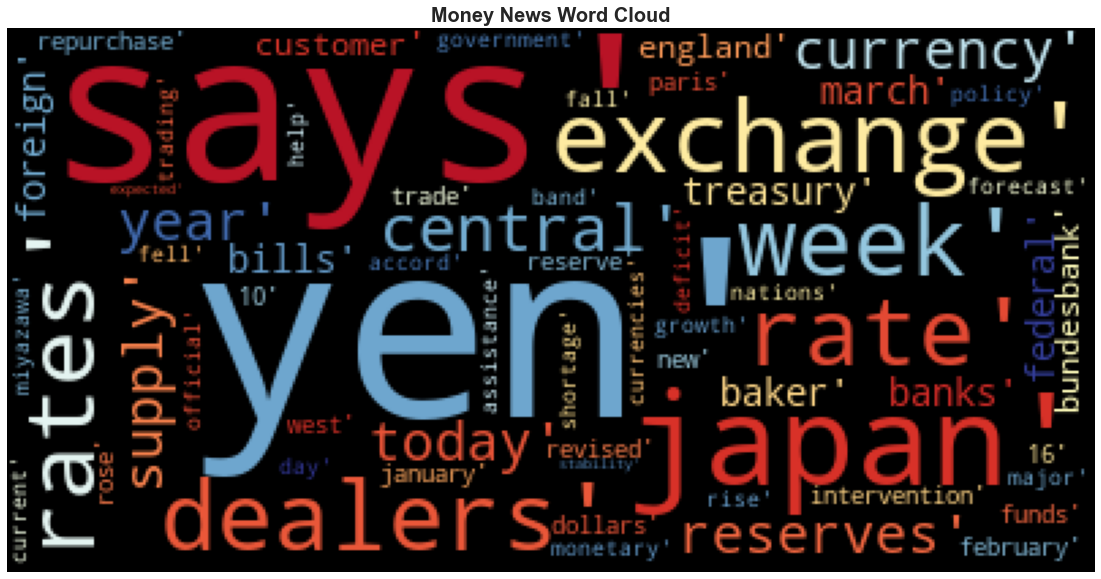

In [8]:
# Create a string list of terms to generate the word cloud
terms_list = str(top_words["Word"].tolist())

# Create the word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(terms_list)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Money News Word Cloud", fontdict=fontdict)
plt.show()


In [6]:
def retrieve_docs(terms):
    result_docs = []
    for doc_id in money_news_ids:
        found_terms = [
            word
            for word in reuters.words(doc_id)
            if any(term in word.lower() for term in terms)
        ]
        if len(found_terms) > 0:
            result_docs.append(doc_id)
    return result_docs



In [9]:
len(retrieve_docs(["yen"]))


182

In [8]:
len(retrieve_docs(["japan", "banks"]))


326

In [7]:
len(retrieve_docs(["england", "dealers"]))


299